# Chương 4. HỌC MÁY

## Các phương pháp tính khoảng cách thông dụng

### Khoảng cách Euclid

Khoảng cách Euclid là độ dài của đoạn thẳng nối hai điểm, trong không gian hai chiều (2D) nó được tính dựa trên định lý Pythagore. Xét trên dạng tổng quát cho 2 điểm dữ liệu $x = (x_1, x_2,...x_n)$ và $y = (y_1, y_2,...y_n)$ trong không gian n-chiều, khi đó khoảng các giữa 2 điểm $x$ và $y$  được xác định bởi công thức sau:
\begin{equation}
d(x,y) = \sqrt{\sum\limits_{i = 1}^{n} (x_{i} - y_{i})^2}
\end{equation}

In [1]:
import numpy as np

def euclidean_distance(x1, x2):
    """
    Tính khoảng cách Euclid giữa hai điểm (hoặc vector).

    Parameters:
        x1, x2: array-like
            Hai điểm hoặc vector cần tính khoảng cách.

    Returns:
        float: khoảng cách Euclid giữa x1 và x2
    """
    x1 = np.array(x1)
    x2 = np.array(x2)
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

# Ví dụ:
point1 = [1, 2, 3]
point2 = [4, 6, 3]

print("Khoảng cách Euclid:", euclidean_distance(point1, point2))


Khoảng cách Euclid: 5.0


### Khoảng cách Mahattan

Khoảng cách Mahattan hay còn gọi là khoảng cách City Block hoặc L1-norm là tổng các giá trị tuyệt đối của sự khác biệt giữa các tọa độ tương ứng của hai điểm. Nó được gọi là khoảng cách Manhattan vì giống như cách tính khoảng cách đi bộ giữa các tòa nhà trên đường phố Manhattan.
\begin{equation}
    d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
\end{equation}

In [2]:
def manhattan_distance(x1, x2):
    """
    Tính khoảng cách Manhattan giữa hai điểm (hoặc vector).

    Parameters:
        x1, x2: array-like
            Hai điểm hoặc vector cần tính khoảng cách.

    Returns:
        float: khoảng cách Manhattan giữa x1 và x2
    """
    x1 = np.array(x1)
    x2 = np.array(x2)
    distance = np.sum(np.abs(x1 - x2))
    return distance

# Ví dụ:
point1 = [1, 2, 3]
point2 = [4, 6, 3]

print("Khoảng cách Manhattan:", manhattan_distance(point1, point2))


Khoảng cách Manhattan: 7


### Khoảng cách Minkowski

Khoảng cách Minkowski là dạng khoảng cách tổng quát hóa của khoảng cách Euclid và Manhattan với công thức được định nghĩa phụ thuộc trên tham số $p \geq 1$, nghĩa là với $p = 1 $ thì khoảng cách Minskowski sẽ là Mahattan và $p = 2$ sẽ là Euclid:
\begin{equation}
      d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
\end{equation}

In [4]:
import numpy as np

def minkowski_distance(x1, x2, p=3):
    """
    Tính khoảng cách Minkowski giữa hai điểm (hoặc vector).

    Parameters:
        x1, x2: array-like
            Hai điểm hoặc vector cần tính khoảng cách.
        p: int hoặc float
            Bậc của khoảng cách (p=1 → Manhattan, p=2 → Euclid).

    Returns:
        float: khoảng cách Minkowski giữa x1 và x2
    """
    x1 = np.array(x1)
    x2 = np.array(x2)
    distance = np.sum(np.abs(x1 - x2) ** p) ** (1 / p)
    return distance

# Ví dụ:
point1 = [1, 2, 3]
point2 = [4, 6, 3]

print("Khoảng cách Minkowski (p=3):", minkowski_distance(point1, point2, p=3))

Khoảng cách Minkowski (p=3): 4.497941445275415


## Thuật toán K-NN

Thuật toán K-NN (K-Nearest Neighbors) là một phương pháp học có giám sát đơn giản, được giới thiệu bởi Evelyn Fix và Joseph Hodges năm 1951. Ý tưởng chính là tìm K điểm lân cận gần nhất trong tập dữ liệu đã gán nhãn để xác định nhãn của điểm cần dự đoán. 

Các khoảng cách phổ biến gồm: Euclidean, City Block, Cosine và Correlation. Việc chọn loại khoảng cách và giá trị K ảnh hưởng lớn đến độ chính xác của mô hình. Các bước xây dựng thuật toán bao gồm:
- Bước 1: Dữ liệu được chia thành 2 tập bao gồm: tập tính toán (Calculating data) và tập kiểm tra (Testing Data).
- Bước 2: Xác định giá trị và số lượng lân cận K trước khi chạy thuật toán.
- Bước 3: Tính toán khoảng cách và xác định lân cận giữa điểm dữ liệu cần dự đoán trong tập kiểm tra với tất cả các điểm trong tập tính toán.
- Bước 4: Sắp xếp các khoảng cách này theo thứ tự tăng dần và xác định K điểm gần nhất với từng điểm trong tập kiểm tra.
- Bước 5: Nhãn của điểm dữ liệu sau khi đã xác định được K điểm lân cận, được dự đoán bằng cách chọn nhãn xuất hiện nhiều nhất trong K nhãn vừa tìm được.

<p align="center">
  <img src="picture/KNN_sim.drawio.png" width="700">
  <br>
  <em>Hình 1. Quá trình xác định nhãn cho một điểm dựa trên tần suất xuất hiện của chúng của K = 5 điểm lân cận.</em>
</p>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
card_trans = pd.read_csv('data/card_transdata.csv')

# 2. Tách X, y
df = pd.DataFrame(card_trans)
X = df.drop('fraud', axis=1)   # Features: X
y = df['fraud']                # Target: y

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Pipeline: Chuẩn hoá + KNN
knn_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2))  # p=2 => Euclid
])

# 5. Huấn luyện
knn_clf.fit(X_train, y_train)

# 6. Dự đoán & đánh giá
y_pred = knn_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"KNN accuracy: {acc:.4f}")


KNN accuracy: 0.9987


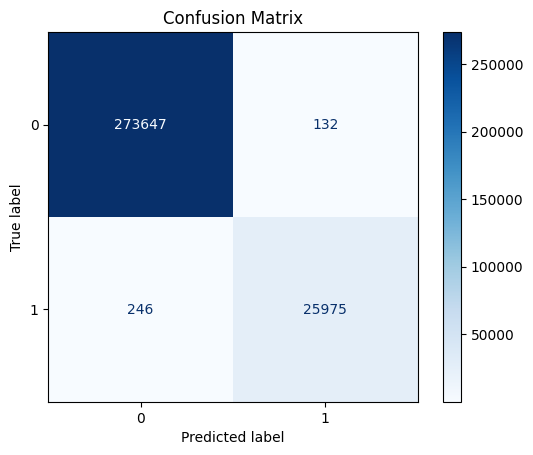

In [10]:
# 1️⃣ Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
# 3️⃣ Vẽ ma trận trực quan
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Thuật toán Weighted K-NN

Tương tự như thuật toán K-NN cổ điển, tuy nhiên Weighted K-NN sẽ có thể bước tính và lấy tổng các trọng số voting được xác định bởi các kernel function.
- Bước 1: Đầu tiên dữ liệu được sử dụng để tính toán được chia thành 2 tập bao gồm: tập tính toán (Calculating data) và tập kiểm tra (Testing Data)
- Bước 2: Xác định giá trị cũng như số lượng lân cận K trước khi chạy thuật toán.
- Bước 3: Tính toán khoảng cách và xác định các lân cận giữa điểm dữ liệu cần dự đoán trong tập kiểm tra với tất cả các điểm trong tập tính toán.
- Bước 4: Sau khi đã tính được khoảng cách, ta sắp xếp các khoảng cách này theo thứ tự tăng dần và xác định K điểm gần nhất với từng điểm trong tập kiểm tra.
- Bước 5: Tính giá trị voting cho từng điểm lân cận đã tìm được ở bước 4.
- Bước 6: Nhãn của điểm dữ liệu sau khi đã xác định được K điểm lân cận được dự đoán bằng cách chọn nhãn có tổng voting lớn nhất trong K nhãn vừa tìm được.

In [ ]:

# 4. Pipeline: Chuẩn hoá + Weighted KNN
knn_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors=5,
        metric="minkowski",
        p=2,                # p=2 => khoảng cách Euclid
        weights="distance"  # trọng số theo khoảng cách (Weighted KNN)
    ))
])

# 5. Huấn luyện
knn_clf.fit(X_train, y_train)

# 6. Dự đoán & đánh giá
y_pred = knn_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Weighted KNN accuracy: {acc:.4f}")

# 7. Hiển thị ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix - Weighted KNN")
plt.show()

Weighted KNN accuracy: 0.9988


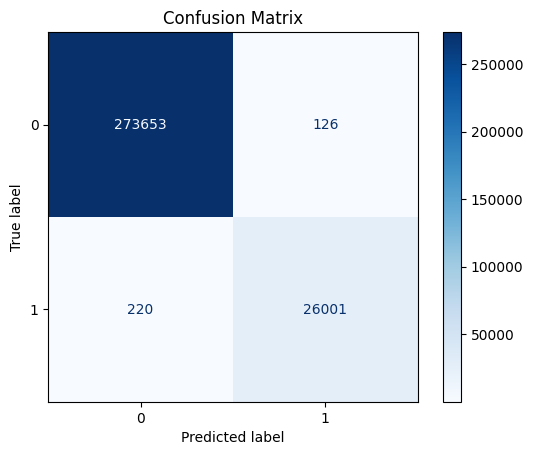

In [3]:
# 1️⃣ Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
# 3️⃣ Vẽ ma trận trực quan
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()